## CIFAR-10 - Object Recognition in Images

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# <a id="load">Loading Data</a>

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 classes

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 128s 1us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


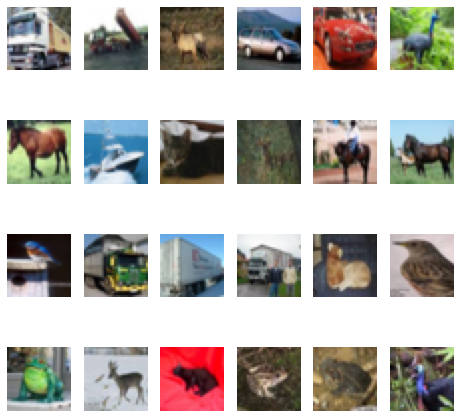

In [4]:

fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 4
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

# <a id="prep"> Pre-processing </a>

In [5]:
print(x_train.max())
print(x_test.max())

255
255


In [6]:
x_train = x_train/225
x_test = x_test/255

In [7]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test,10)

# <a id="bmod"> Build Model </a>

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [11]:
model.fit(x_train,
          y_cat_train,
          batch_size=128,
          epochs=20,
          validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/20
391/391 [==============================] - 84s 177ms/step - loss: 1.9339 - accuracy: 0.2711 - val_loss: 1.6032 - val_accuracy: 0.4258
Epoch 2/20
391/391 [==============================] - 58s 149ms/step - loss: 1.5536 - accuracy: 0.4349 - val_loss: 1.4081 - val_accuracy: 0.4971
Epoch 3/20
391/391 [==============================] - 60s 154ms/step - loss: 1.4218 - accuracy: 0.4896 - val_loss: 1.2972 - val_accuracy: 0.5351
Epoch 4/20
391/391 [==============================] - 62s 160ms/step - loss: 1.3276 - accuracy: 0.5281 - val_loss: 1.2830 - val_accuracy: 0.5465
Epoch 5/20
391/391 [==============================] - 57s 147ms/step - loss: 1.2614 - accuracy: 0.5536 - val_loss: 1.1717 - val_accuracy: 0.5882
Epoch 6/20
391/391 [==============================] - 57s 146ms/step - loss: 1.2022 - accuracy: 0.5789 - val_loss: 1.1566 - val_accuracy: 0.5906
Epoch 7/20
391/391 [==============================] - 57s 147ms/step - loss: 1.1492 - accuracy: 0.6003 - val_loss: 1.1146 - val_ac

In [12]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

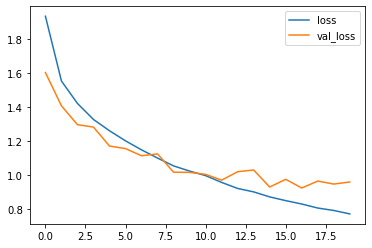

In [13]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

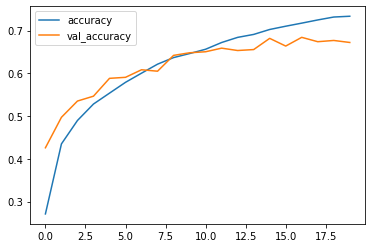

In [14]:
losses[['accuracy','val_accuracy']].plot()

# <a id="eval"> Evaluate Model </a>

In [15]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.9606108665466309, 0.6721000075340271]


In [16]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1000
           1       0.80      0.80      0.80      1000
           2       0.56      0.52      0.54      1000
           3       0.53      0.38      0.44      1000
           4       0.56      0.71      0.63      1000
           5       0.62      0.51      0.56      1000
           6       0.66      0.82      0.73      1000
           7       0.79      0.70      0.74      1000
           8       0.81      0.76      0.79      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [18]:
confusion_matrix(y_test,predictions)

array([[749,  26,  55,  13,  22,   3,  15,   6,  65,  46],
       [ 33, 795,   8,   9,   6,   1,  13,   2,  21, 112],
       [ 82,   5, 517,  45, 140,  61,  99,  20,  22,   9],
       [ 32,  23,  85, 381, 123, 145, 137,  35,  18,  21],
       [ 43,   2,  62,  30, 709,  18,  61,  63,   3,   9],
       [ 18,   9,  87, 156,  97, 505,  57,  49,   9,  13],
       [ 11,   8,  46,  30,  52,  16, 821,   3,   6,   7],
       [ 35,   3,  40,  32,  94,  57,  16, 696,   0,  27],
       [116,  42,  11,  12,  10,   2,   7,   2, 762,  36],
       [ 48,  85,   7,   8,   7,   4,  18,   8,  29, 786]], dtype=int64)

# <a id="pred"> Predict </a>

In [19]:
classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# https://www.cs.toronto.edu/~kriz/cifar.html

d = dict(zip(classes, class_names))

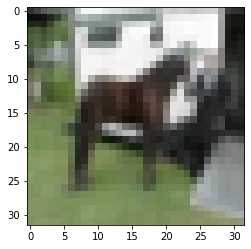

In [31]:
my_image = x_test[20]

plt.imshow(my_image)

In [32]:
input_img = my_image.reshape(1,32,32,3)

predictions = np.argmax(model.predict(input_img), axis=-1)[0]

print(f"True class: {d[y_test[20][0]]} \n\nPredicted class: {d[predictions]}")

True class: horse 

Predicted class: horse
